In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
dataset = pd.read_csv('electricity_demand.csv')
dataset.head()

,date,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,1/1/2015,99635.030,25.633696,13.3,5.186521,0.000000,0.0,N,Y
1,1/2/2015,129606.010,33.138988,15.4,6.228965,0.880597,0.0,N,N
2,1/3/2015,142300.540,34.564855,20.0,6.180615,1.011321,0.0,N,N
3,1/4/2015,104330.715,25.005560,16.3,4.626013,1.051587,4.2,N,N
4,1/5/2015,118132.200,26.724176,15.0,4.690416,0.820847,0.0,N,N


In [3]:
#Dataset correlation matrix
corrmat = dataset.corr()
corrmat.style.background_gradient(cmap='Blues').set_precision(2)

,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.00,0.23,-0.15,-0.12,0.04,-0.07
RRP,0.23,1.00,0.06,0.13,-0.01,-0.03
min_temperature,-0.15,0.06,1.00,0.71,0.19,0.00
max_temperature,-0.12,0.13,0.71,1.00,0.05,-0.16
solar_exposure,0.04,-0.01,0.19,0.05,1.00,-0.02
rainfall,-0.07,-0.03,0.00,-0.16,-0.02,1.00


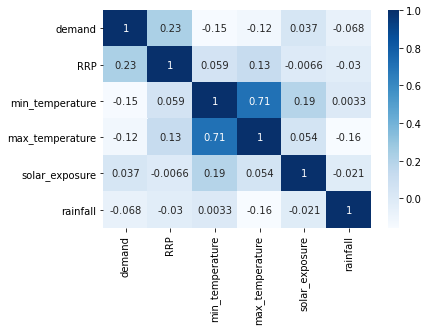

In [4]:
sns.heatmap(dataset.corr(), annot=True, cmap = 'Blues')
plt.show()

In [5]:
#Check for NA/Missing values
dataset.isnull().sum(axis = 0)

date               0
demand             0
RRP                0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand'>

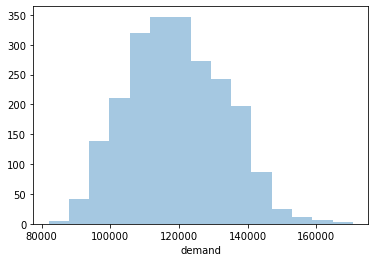

In [6]:
#Histogram of 'demand'
sns.distplot(dataset.demand.dropna(),kde = False, bins = 15)

In [7]:
#Only utilising the RRP variable 
dataset = dataset.dropna(subset=["demand"])

dataset=dataset.reset_index(drop=True)
training_set = dataset.iloc[:,1:2].values
training_set

array([[ 99635.03],
       [129606.01],
       [142300.54],
       ...,
       [107807.  ],
       [103417.66],
       [ 97551.09]])

In [8]:
print(training_set.shape)

(2251, 1)


In [9]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
x_train = []
y_train = []

n_future = 59 # next 59 days (Jan 2021 - Feb 2021)
n_past = 2192 # Past 2192 days (Jan 2015 - Dec 2020)

for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [11]:
#Import relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [12]:
# Define the layers in our RNN model and tune hyperparameters
rnn = Sequential()
rnn.add((LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = n_future,activation='linear'))

rnn.compile(optimizer='adam', loss='mean_absolute_error',metrics=['acc'])
rnn.fit(x_train, y_train, epochs=100, batch_size=32 )

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3153 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 0.3116 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.3073 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.3015 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.2929 - acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.2923 - acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.2748 - acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.2760 - acc: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.2694 - acc: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.2500 - acc: 0.0000e+00
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 3s 3s/step - loss: 0.1321 - acc: 1.0000
Epoch 88/100
1/1 [==============================] - 3s 3s/step - loss: 0.0747 - acc: 1.0000
Epoch 89/100
1/1 [==============================] - 3s 3s/step - loss: 0.1172 - acc: 0.0000e+00
Epoch 90/100
1/1 [==============================] - 3s 3s/step - loss: 0.1021 - acc: 0.0000e+00
Epoch 91/100
1/1 [==============================] - 3s 3s/step - loss: 0.1205 - acc: 0.0000e+00
Epoch 92/100
1/1 [==============================] - 3s 3s/step - loss: 0.0824 - acc: 0.0000e+00
Epoch 93/100
1/1 [==============================] - 3s 3s/step - loss: 0.0578 - acc: 1.0000
Epoch 94/100
1/1 [==============================] - 3s 3s/step - loss: 0.0812 - acc: 0.0000e+00
Epoch 95/100
1/1 [==============================] - 3s 3s/step - loss: 0.0603 - acc: 1.0000
Epoch 96/100
1/1 [==============================] - 3s 3s/step - loss: 0.0648 - acc: 1.0000
Epoch 97/100
1/1 [==============================] - 3s 3s/step - loss: 0.

In [28]:
# Define the layers in our RNN model and increase epochs from 100 to 500
rnn = Sequential()
rnn.add((LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = n_future,activation='linear'))

rnn.compile(optimizer='adam', loss='mean_absolute_error',metrics=['acc'])
rnn.fit(x_train, y_train, epochs=500, batch_size=32 )

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 0.3146 - acc: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 3s 3s/step - loss: 0.3141 - acc: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.3086 - acc: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 0.3068 - acc: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 0.3056 - acc: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.2977 - acc: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.2943 - acc: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 3s 3s/step - loss: 0.2877 - acc: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 3s 3s/step - loss: 0.2752 - acc: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 3s 3s/step - loss: 0.2716 - acc: 0.0000e+00
Epoch 11/500
1/1 [==============================]

1/1 [==============================] - 3s 3s/step - loss: 0.1091 - acc: 0.0000e+00
Epoch 87/500
1/1 [==============================] - 3s 3s/step - loss: 0.1097 - acc: 0.0000e+00
Epoch 88/500
1/1 [==============================] - 3s 3s/step - loss: 0.0634 - acc: 0.0000e+00
Epoch 89/500
1/1 [==============================] - 3s 3s/step - loss: 0.0716 - acc: 0.0000e+00
Epoch 90/500
1/1 [==============================] - 3s 3s/step - loss: 0.0637 - acc: 0.0000e+00
Epoch 91/500
1/1 [==============================] - 3s 3s/step - loss: 0.0747 - acc: 0.0000e+00
Epoch 92/500
1/1 [==============================] - 3s 3s/step - loss: 0.0886 - acc: 0.0000e+00
Epoch 93/500
1/1 [==============================] - 3s 3s/step - loss: 0.0910 - acc: 0.0000e+00
Epoch 94/500
1/1 [==============================] - 3s 3s/step - loss: 0.0806 - acc: 0.0000e+00
Epoch 95/500
1/1 [==============================] - 3s 3s/step - loss: 0.1276 - acc: 0.0000e+00
Epoch 96/500
1/1 [==============================] - 3

1/1 [==============================] - 3s 3s/step - loss: 0.0297 - acc: 0.0000e+00
Epoch 172/500
1/1 [==============================] - 3s 3s/step - loss: 0.0331 - acc: 1.0000
Epoch 173/500
1/1 [==============================] - 3s 3s/step - loss: 0.0819 - acc: 1.0000
Epoch 174/500
1/1 [==============================] - 3s 3s/step - loss: 0.1092 - acc: 0.0000e+00
Epoch 175/500
1/1 [==============================] - 3s 3s/step - loss: 0.0553 - acc: 1.0000
Epoch 176/500
1/1 [==============================] - 3s 3s/step - loss: 0.0681 - acc: 0.0000e+00
Epoch 177/500
1/1 [==============================] - 3s 3s/step - loss: 0.0744 - acc: 1.0000
Epoch 178/500
1/1 [==============================] - 3s 3s/step - loss: 0.0579 - acc: 1.0000
Epoch 179/500
1/1 [==============================] - 3s 3s/step - loss: 0.0519 - acc: 1.0000
Epoch 180/500
1/1 [==============================] - 3s 3s/step - loss: 0.0491 - acc: 1.0000
Epoch 181/500
1/1 [==============================] - 3s 3s/step - loss: 

1/1 [==============================] - 3s 3s/step - loss: 0.0273 - acc: 0.0000e+00
Epoch 258/500
1/1 [==============================] - 3s 3s/step - loss: 0.0265 - acc: 1.0000
Epoch 259/500
1/1 [==============================] - 3s 3s/step - loss: 0.0526 - acc: 1.0000
Epoch 260/500
1/1 [==============================] - 3s 3s/step - loss: 0.0569 - acc: 1.0000
Epoch 261/500
1/1 [==============================] - 3s 3s/step - loss: 0.0499 - acc: 1.0000
Epoch 262/500
1/1 [==============================] - 3s 3s/step - loss: 0.0574 - acc: 0.0000e+00
Epoch 263/500
1/1 [==============================] - 3s 3s/step - loss: 0.0316 - acc: 1.0000
Epoch 264/500
1/1 [==============================] - 3s 3s/step - loss: 0.0423 - acc: 1.0000
Epoch 265/500
1/1 [==============================] - 3s 3s/step - loss: 0.0393 - acc: 1.0000
Epoch 266/500
1/1 [==============================] - 3s 3s/step - loss: 0.0357 - acc: 0.0000e+00
Epoch 267/500
1/1 [==============================] - 3s 3s/step - loss: 

1/1 [==============================] - 3s 3s/step - loss: 0.0344 - acc: 1.0000
Epoch 345/500
1/1 [==============================] - 3s 3s/step - loss: 0.0756 - acc: 1.0000
Epoch 346/500
1/1 [==============================] - 3s 3s/step - loss: 0.0401 - acc: 1.0000
Epoch 347/500
1/1 [==============================] - 3s 3s/step - loss: 0.0303 - acc: 1.0000
Epoch 348/500
1/1 [==============================] - 3s 3s/step - loss: 0.0547 - acc: 1.0000
Epoch 349/500
1/1 [==============================] - 3s 3s/step - loss: 0.0463 - acc: 1.0000
Epoch 350/500
1/1 [==============================] - 3s 3s/step - loss: 0.0312 - acc: 1.0000
Epoch 351/500
1/1 [==============================] - 3s 3s/step - loss: 0.0496 - acc: 1.0000
Epoch 352/500
1/1 [==============================] - 3s 3s/step - loss: 0.0362 - acc: 1.0000
Epoch 353/500
1/1 [==============================] - 3s 3s/step - loss: 0.0514 - acc: 0.0000e+00
Epoch 354/500
1/1 [==============================] - 3s 3s/step - loss: 0.0341 -

1/1 [==============================] - 3s 3s/step - loss: 0.0281 - acc: 1.0000
Epoch 432/500
1/1 [==============================] - 3s 3s/step - loss: 0.0292 - acc: 1.0000
Epoch 433/500
1/1 [==============================] - 3s 3s/step - loss: 0.0314 - acc: 1.0000
Epoch 434/500
1/1 [==============================] - 3s 3s/step - loss: 0.0253 - acc: 1.0000
Epoch 435/500
1/1 [==============================] - 3s 3s/step - loss: 0.0516 - acc: 0.0000e+00
Epoch 436/500
1/1 [==============================] - 3s 3s/step - loss: 0.0336 - acc: 0.0000e+00
Epoch 437/500
1/1 [==============================] - 3s 3s/step - loss: 0.0300 - acc: 1.0000
Epoch 438/500
1/1 [==============================] - 3s 3s/step - loss: 0.0323 - acc: 1.0000
Epoch 439/500
1/1 [==============================] - 3s 3s/step - loss: 0.0293 - acc: 1.0000
Epoch 440/500
1/1 [==============================] - 3s 3s/step - loss: 0.0376 - acc: 0.0000e+00
Epoch 441/500
1/1 [==============================] - 4s 4s/step - loss: 

In [29]:
# read test dataset
testdataset = pd.read_csv('electricity_demand.csv')

#get only the RRP column
testdataset = testdataset.iloc[:2192,1:2].values

real_elecdemand = pd.read_csv('electricity_demand.csv')
real_elecdemand = real_elecdemand.iloc[2192:,1:2].values

testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

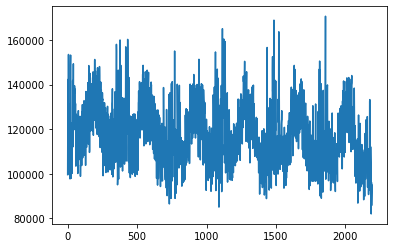

In [30]:
#Plot test dataset
plt.plot(testdataset)

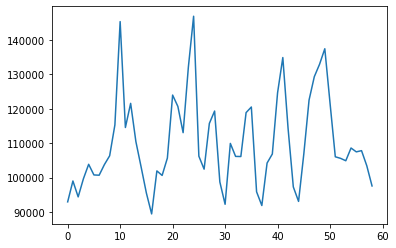

In [31]:
#Plot actual values of 'demand'
plt.plot(real_elecdemand)

In [32]:
predicted_elecdemand = rnn.predict(testing)
predicted_elecdemand = sc.inverse_transform(predicted_elecdemand)
predicted_elecdemand = np.reshape(predicted_elecdemand,(predicted_elecdemand.shape[1],predicted_elecdemand.shape[0]))

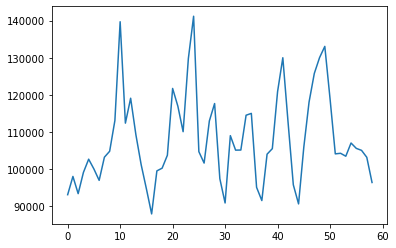

In [33]:
#Plot PREDICTED values of 'demand'
plt.plot(predicted_elecdemand)

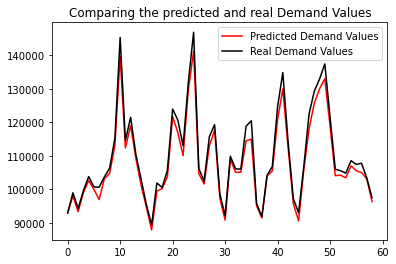

In [34]:
#Merge both plots in 1 graph 
plt.plot(predicted_elecdemand, color = 'red', label = "Predicted Demand Values")
plt.plot(real_elecdemand, color = 'black', label = "Real Demand Values")
plt.title('Comparing the predicted and real Demand Values')
plt.legend()
plt.show()

In [35]:
#Import performance metric libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [36]:
#Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(real_elecdemand, predicted_elecdemand)
mae

2030.8375582627127

In [37]:
#Calculating the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(real_elecdemand, predicted_elecdemand)*100
mape

1.7599973342911106